In [12]:
import sys
import pandas as pd
import numpy as np
import nltk
import os

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

from sqlalchemy import create_engine

import pickle
import matplotlib.pyplot as plt
from sklearn import multioutput
nltk.download('punkt')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\koustubhapriya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:


def load_data():
        engine = create_engine('sqlite:///disastermessages.db')
        X, Y, category_names = load_data(engine)
        print(X)
        print(Y)
        return X,Y




In [20]:


engine = create_engine('sqlite:///disastermessages.db')
df = pd.read_sql_table('disastermessage', engine)
df.head()
X = df.loc[:, 'original'].astype(str)
print(X)
Y = df.iloc[:, 3:].astype(str)
categories = list(Y)
print(categories)
display (Y.head (n=4))



0        Un front froid se retrouve sur Cuba ce matin. ...
1                       Cyclone nan fini osinon li pa fini
2        Patnm, di Maryani relem pou li banm nouvel li ...
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        facade ouest d Haiti et le reste du pays aujou...
                               ...                        
26381                                                 None
26382                                                 None
26383                                                 None
26384                                                 None
26385                                                 None
Name: original, Length: 26386, dtype: object
['genre', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


,genre,0,1,2,3,4,5,6,7,8,...,26,27,28,29,30,31,32,33,34,35
0,direct,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,direct,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,direct,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,direct,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,search_and_rescue-0,security-0,military-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [4]:


engine = create_engine('sqlite:///disastermessages.db')
df = pd.read_sql_table('disastermessage', engine)
df.head()
X = df.loc[:, 'original'].astype(str)
print(X)
Y = df.iloc[:, 4:].astype(str)
categories = list(Y)
print(categories)
display (Y.head (n=3))



0        Un front froid se retrouve sur Cuba ce matin. ...
1                       Cyclone nan fini osinon li pa fini
2        Patnm, di Maryani relem pou li banm nouvel li ...
3        UN reports Leogane 80-90 destroyed. Only Hospi...
4        facade ouest d Haiti et le reste du pays aujou...
                               ...                        
26381                                                 None
26382                                                 None
26383                                                 None
26384                                                 None
26385                                                 None
Name: original, Length: 26386, dtype: object
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35']


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,search_and_rescue-0,security-0,military-0,child_alone-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [5]:
for column in Y:
    Y[column] = Y[column].astype(str).str[-1]
    Y[column] = Y[column].astype(int)
Y.head()


,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000E7D98688C8>,
      dtype=object)

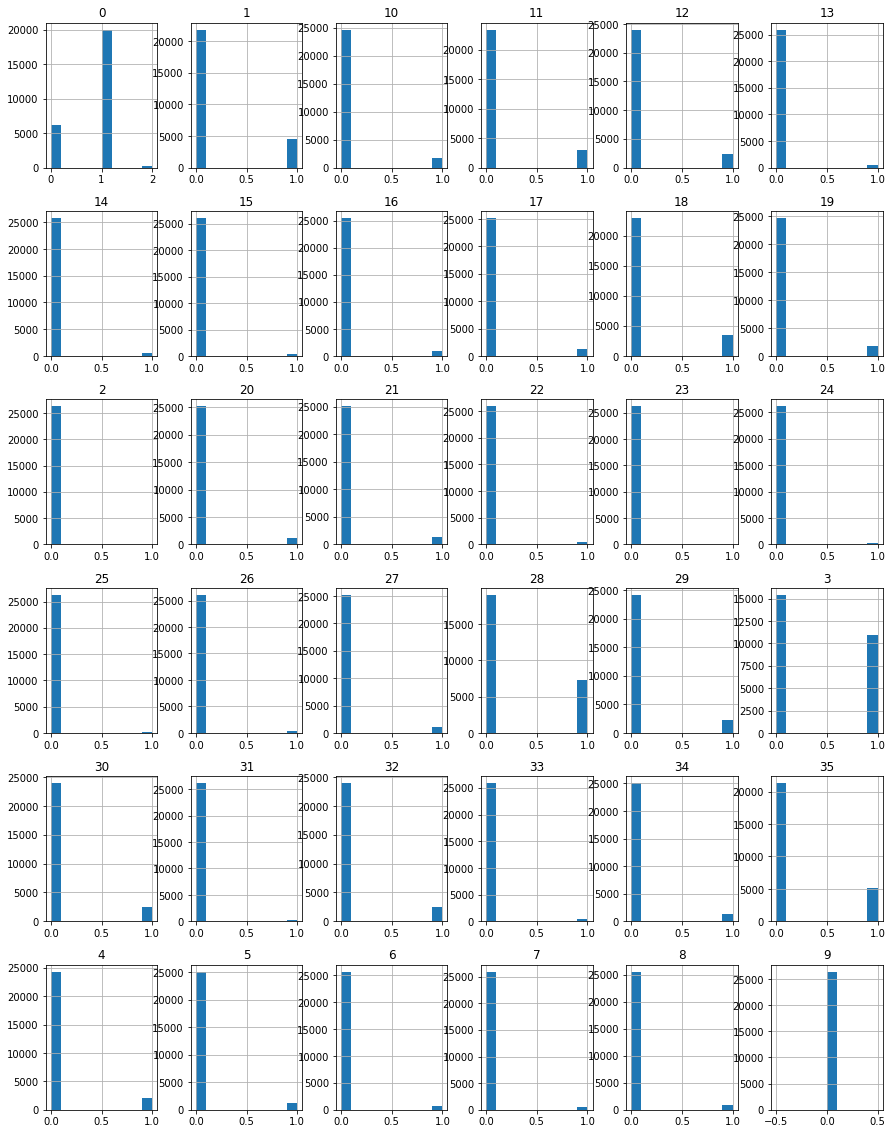

In [6]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
Y.hist(ax = ax)


In [7]:
df.head()

,id,message,original,genre,0,1,2,3,4,5,...,26,27,28,29,30,31,32,33,34,35
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,related-1,request-0,offer-0,aid_related-1,medical_help-0,medical_products-0,...,aid_centers-0,other_infrastructure-0,weather_related-1,floods-0,storm-1,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,related-1,request-1,offer-0,aid_related-1,medical_help-0,medical_products-1,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,related-1,request-0,offer-0,aid_related-0,medical_help-0,medical_products-0,...,aid_centers-0,other_infrastructure-0,weather_related-0,floods-0,storm-0,fire-0,earthquake-0,cold-0,other_weather-0,direct_report-0


In [8]:


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train = X_train.astype(str)
Y_train = Y_train.astype(str)
print(X_train)

print(Y_train)


4287     ske. gin dokt espesyalis. kivini arcahaie. eki...
5549     Donnez le nom des annimaux q'on peux trouver s...
11908                                                 None
295      j aimerais laisser le pays pour aller retrouve...
20428                                                 None
                               ...                        
7280     Mesi mon konpayi Digicel mwen felitew anpil po...
9889     Bonjour ! Est-ce-que vous pouvait me donnes in...
13399                                                 None
15943                                                 None
12072                                                 None
Name: original, Length: 21108, dtype: object
       0  1  2  3  4  5  6  7  8  9  ... 26 27 28 29 30 31 32 33 34 35
4287   1  1  0  1  1  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
5549   0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
11908  0  0  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  0  0  0  0  0
295    1  0  0  0  0  

In [15]:


def tokenize(text):
    tokens = nltk.word_tokenize(text)
    lemmatizer = nltk.WordNetLemmatizer()
    return [lemmatizer.lemmatize(w).lower().strip() for w in tokens]
from sklearn.ensemble import RandomForestClassifier
from sqlalchemy import create_engine
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
engine = create_engine('sqlite:///disastermessages.db')
df = pd.read_sql_table('disastermessage', engine)

X = df.loc[:, 'original'].astype(str)
Y = df.iloc[:, 3:].astype(str)

pipeline = Pipeline([('cvect', CountVectorizer(tokenizer = tokenize)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', RandomForestClassifier())
                     ])


X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
pipeline.fit(X_train, Y_train)



C:\Users\koustubhapriya\Contacts\New folder\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('cvect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function tokenize a...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.

In [ ]:
def tokenize(text):

    token1 = word_tokenize(text)
    x = WordNetLemmatizer()
    token1 = [x.lemmatize(t).lower().strip() for t in tokens]

    return token1


In [ ]:




def build_pipeline_model():
    

   #setting pipeline
    pipeline1 = Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
            ('tfidf', TfidfTransformer()),
    #        ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier(), n_jobs = 35))
            ('clf', multioutput.MultiOutputClassifier (RandomForestClassifier()))
            ])

    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 25)
    
    return pipeline1




In [ ]:
def evaluate_pipeline_model(model, X_test, Y_test):
    
    prediction1 = model.predict(X_test)
    
    # Since there are 36 categories, we'll just loop over them to calculate the accuracy of each category.
    print("Accuracy scores for each category\n")
    print("*-" * 30)

    for i in range(36):
        print("Category:", category_names[i],"\n", classification_report(Y_test[:, i], predictions[:, i]))

In [40]:


def main():
        engine = create_engine('sqlite:///disastermessages.db')
        df = pd.read_sql_table('disastermessage', engine)
        X = df['message']
        Y = df.iloc[:,4:]
        print('Loading data...\n    DATABASE: {}'.format(engine))
        X, Y, category_names = load_data(engine)
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

        print('Building random forest model with best parameters')
        model = build_pipeline_model()

        print('Training model...')
        model.fit(X_train, Y_train)
        
        print('Evaluating model...')
        evaluate_model(model, X_test, Y_test)

        print('Saving model...\n    MODEL: {}'.format(model_filepath))
        save_model(model, model_filepath)

        print('Trained model saved!')

